### Time Series Forecast of Ozone

In [1]:
import pandas as pd
df = pd.read_csv('LA o3.csv', parse_dates=['date','utc','local'], index_col='utc')

In [2]:
df = df.resample('d').mean()
df = df.interpolate(method='time')
df.head()

,value,mobile,latitude,longitude,url,averaging_time,station,latitude-2,longitude-2,elevation,...,slp,stp,visibility,wind_speed,max_sustained_wind,gust,max_temp,min_temp,precipitation,snow_depth
utc,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.032111,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1012.5,986.8,10.0,4.5,12.0,NaN,68.0,43.0,0.0,0.0
2020-01-03,0.008792,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1019.9,994.0,10.0,1.6,6.0,NaN,73.0,45.0,0.0,0.0
2020-01-04,0.009125,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1025.1,999.1,10.0,1.1,6.0,NaN,73.0,42.1,0.0,0.0
2020-01-05,0.012125,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1024.2,998.0,10.0,2.8,11.1,18.100000,73.0,42.1,0.0,0.0
2020-01-06,0.020143,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1023.5,997.6,10.0,2.5,6.0,16.733333,75.0,42.1,0.0,0.0


<AxesSubplot:xlabel='utc'>

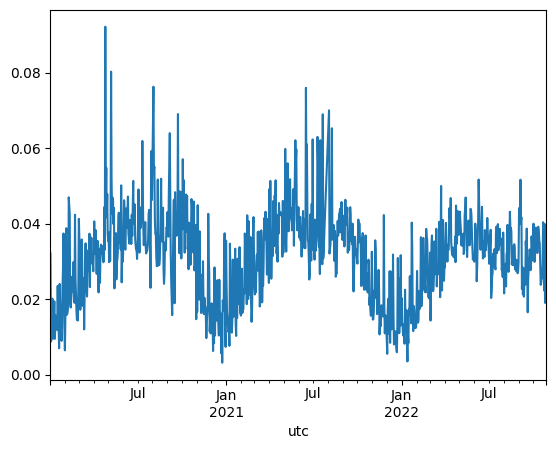

In [3]:
df['value'].plot()

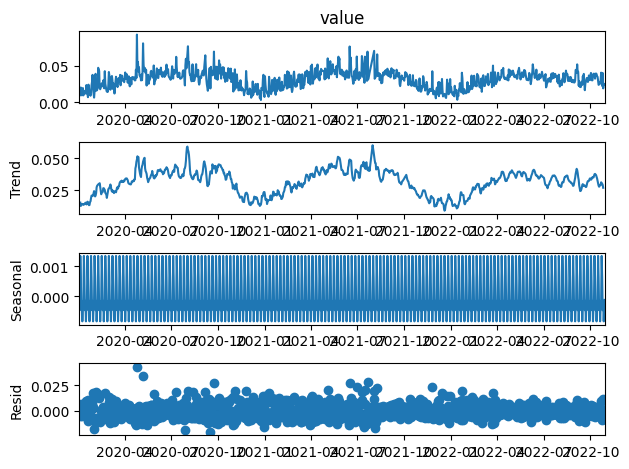

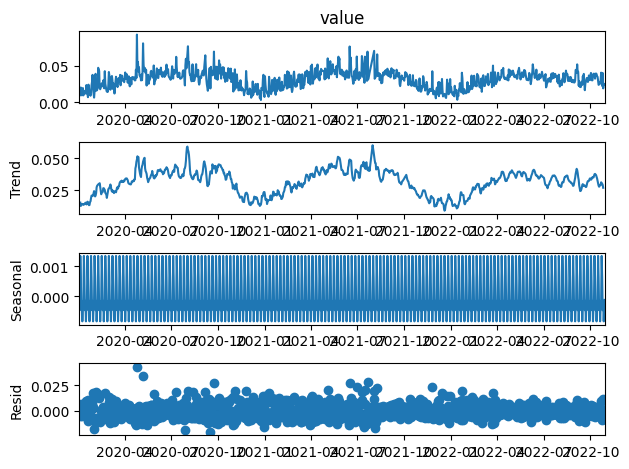

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df['value'], model="additive")
decompose_data.plot()

<AxesSubplot:xlabel='utc'>

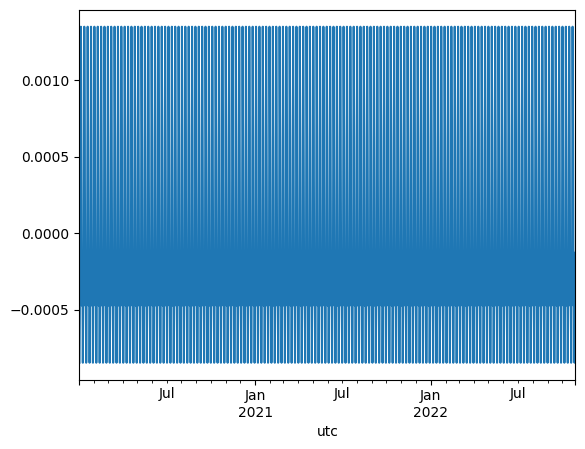

In [5]:
seasonality = decompose_data.seasonal
seasonality.plot()

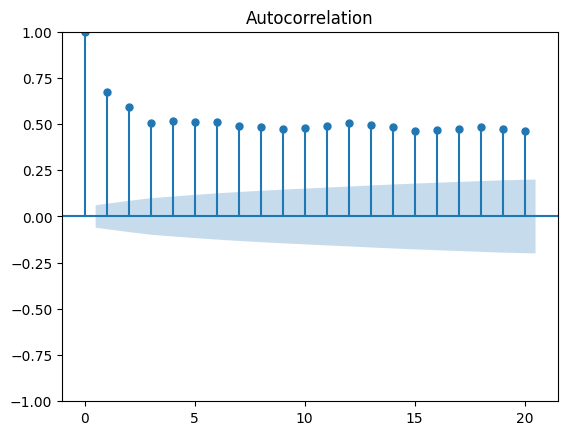

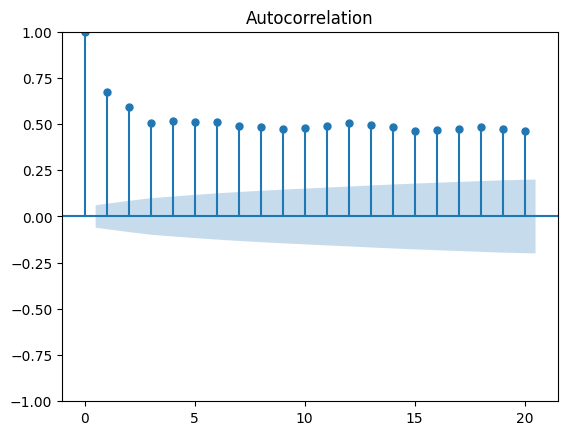

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['value'], lags=20, alpha=0.05)

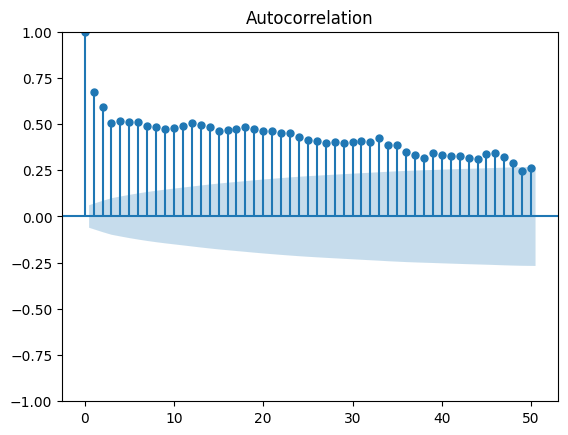

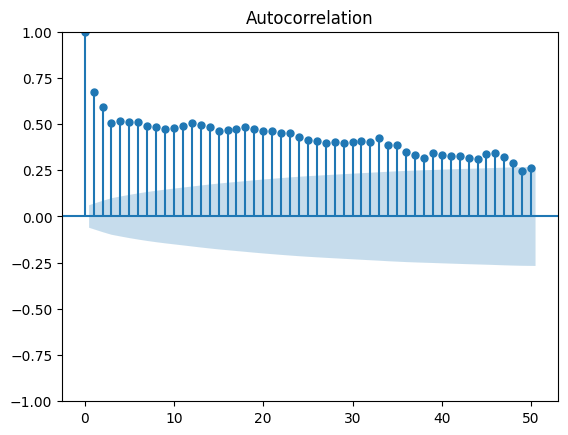

In [7]:
plot_acf(df['value'], lags=50, alpha=0.05)

There are significant values out to the 40s, but the most significant values appear to be the first 5 lags.

In [8]:
min_date = df.index.values.min()
max_date = df.index.values.max()
train_percent = 0.80
interval = max_date - min_date
train_cutoff = min_date + train_percent*interval

train_df = df[df.index.values <= train_cutoff]
test_df = df[df.index.values > train_cutoff]



In [9]:
train_df.head()

,value,mobile,latitude,longitude,url,averaging_time,station,latitude-2,longitude-2,elevation,...,slp,stp,visibility,wind_speed,max_sustained_wind,gust,max_temp,min_temp,precipitation,snow_depth
utc,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.032111,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1012.5,986.8,10.0,4.5,12.0,NaN,68.0,43.0,0.0,0.0
2020-01-03,0.008792,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1019.9,994.0,10.0,1.6,6.0,NaN,73.0,45.0,0.0,0.0
2020-01-04,0.009125,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1025.1,999.1,10.0,1.1,6.0,NaN,73.0,42.1,0.0,0.0
2020-01-05,0.012125,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1024.2,998.0,10.0,2.8,11.1,18.100000,73.0,42.1,0.0,0.0
2020-01-06,0.020143,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.20056,-118.3575,225.9,...,1023.5,997.6,10.0,2.5,6.0,16.733333,75.0,42.1,0.0,0.0


In [10]:
test_df.head()

,value,mobile,latitude,longitude,url,averaging_time,station,latitude-2,longitude-2,elevation,...,slp,stp,visibility,wind_speed,max_sustained_wind,gust,max_temp,min_temp,precipitation,snow_depth
utc,,,,,,,,,,,,,,,,,,,,,
2022-04-06,0.029960,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1011.9,986.8,10.0,3.7,8.9,17.95,98.1,60.1,0.0,0.0
2022-04-07,0.033884,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1015.7,990.7,10.0,4.0,9.9,15.90,100.0,60.1,0.0,0.0
2022-04-08,0.033035,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1012.9,987.9,10.0,4.5,13.0,17.00,100.0,63.0,0.0,0.0
2022-04-09,0.034162,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1008.4,983.5,10.0,5.3,12.0,18.10,99.0,64.9,0.0,0.0
2022-04-10,0.044093,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1009.0,983.7,9.5,5.7,9.9,15.90,80.1,59.0,0.0,0.0


In [11]:
train_df.tail()

,value,mobile,latitude,longitude,url,averaging_time,station,latitude-2,longitude-2,elevation,...,slp,stp,visibility,wind_speed,max_sustained_wind,gust,max_temp,min_temp,precipitation,snow_depth
utc,,,,,,,,,,,,,,,,,,,,,
2022-04-01,0.028434,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1010.4,984.8,9.8,4.0,8.9,19.428571,73.0,53.1,0.0,0.0
2022-04-02,0.035459,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1013.9,988.4,9.4,4.0,8.0,19.571429,73.0,53.1,0.0,0.0
2022-04-03,0.040215,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1013.7,988.1,10.0,4.5,8.9,19.714286,69.1,54.0,0.0,0.0
2022-04-04,0.034867,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1011.6,986.1,8.1,5.0,8.9,19.857143,73.9,54.0,0.0,0.0
2022-04-05,0.034336,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1011.1,985.8,10.0,7.3,15.0,20.000000,89.1,54.0,0.0,0.0


In [12]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

end_train = '2022-04-05'
power = 2
#poly_process = PolynomialFeatures(degree = power, include_bias=True)

X = train_df[['stp', 'wind_speed', 'max_sustained_wind', 'max_temp', 'min_temp','temperature', 'dewpoint']]
#poly_X = pd.DataFrame(poly_process.fit_transform(X))
#poly_X = pd.concat([train_df, poly_X])
poly_X = X

for key in poly_X.columns:
    for power_iter in range(2, power+1):
        poly_X[f'{key}power{power_iter}']=poly_X[f'{key}'].pow(power_iter)
poly_X.head()
        
                                                       

C:\Users\Matthew\AppData\Local\Temp\ipykernel_17972\3486325704.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_X[f'{key}power{power_iter}']=poly_X[f'{key}'].pow(power_iter)
C:\Users\Matthew\AppData\Local\Temp\ipykernel_17972\3486325704.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_X[f'{key}power{power_iter}']=poly_X[f'{key}'].pow(power_iter)
C:\Users\Matthew\AppData\Local\Temp\ipykernel_17972\3486325704.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,stp,wind_speed,max_sustained_wind,max_temp,min_temp,temperature,dewpoint,stppower2,wind_speedpower2,max_sustained_windpower2,max_temppower2,min_temppower2,temperaturepower2,dewpointpower2
utc,,,,,,,,,,,,,,
2020-01-02,986.8,4.5,12.0,68.0,43.0,56.6,42.1,973774.24,20.25,144.00,4624.0,1849.00,3203.56,1772.41
2020-01-03,994.0,1.6,6.0,73.0,45.0,56.7,39.3,988036.00,2.56,36.00,5329.0,2025.00,3214.89,1544.49
2020-01-04,999.1,1.1,6.0,73.0,42.1,55.5,38.4,998200.81,1.21,36.00,5329.0,1772.41,3080.25,1474.56
2020-01-05,998.0,2.8,11.1,73.0,42.1,54.7,36.3,996004.00,7.84,123.21,5329.0,1772.41,2992.09,1317.69
2020-01-06,997.6,2.5,6.0,75.0,42.1,57.6,29.1,995205.76,6.25,36.00,5625.0,1772.41,3317.76,846.81


In [13]:
forecaster = ForecasterAutoreg(regressor = LinearRegression(), lags = 5)
forecaster.fit(y=train_df['value'], exog=poly_X)

metrics, predictions_backtest = backtesting_forecaster(forecaster = forecaster,
                                                       y = train_df['value'],
                                                       exog=poly_X, 
                                                       initial_train_size = 20,
                                                       fixed_train_size = False,
                                                       steps = 2,
                                                      metric = 'mean_squared_error',
                                                       refit = False,
                                                       verbose = True)
                                                       
print(metrics)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 20
Number of observations used for backtesting: 805
    Number of folds: 403
    Number of steps per fold: 2
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-22 00:00:00 -- 2020-01-23 00:00:00  (n=2)
Data partition in fold: 1
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-24 00:00:00 -- 2020-01-25 00:00:00  (n=2)
Data partition in fold: 2
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-26 00:00:00 -- 2020-01-27 00:00:00  (n=2)
Data partition in fold: 3
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-28 00:00:00 -- 2020-01-29 00:00:00  (n=2)
Data partition in fold: 4
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=2

(0.0, 0.1)

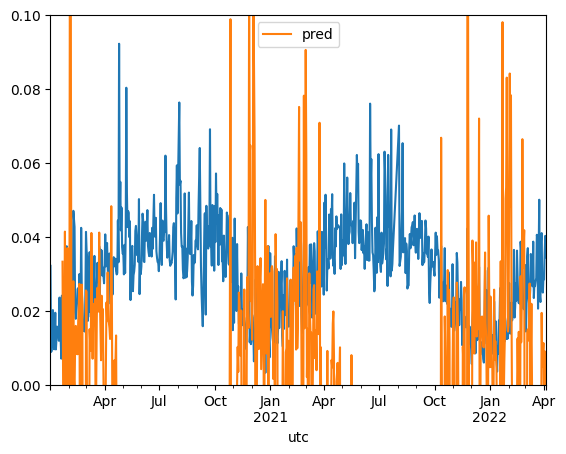

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
train_df['value'].plot(ax = ax)
predictions_backtest.plot(ax=ax)
plt.ylim(0, 0.1)

In [15]:
forecaster = ForecasterAutoreg(regressor = LinearRegression(), lags = 5)
forecaster.fit(y=train_df['value'], exog=poly_X)

metrics, predictions_backtest = backtesting_forecaster(forecaster = forecaster,
                                                       y = train_df['value'],
                                                       exog=poly_X, 
                                                       initial_train_size = 20,
                                                       fixed_train_size = False,
                                                       steps = 1,
                                                      metric = 'mean_squared_error',
                                                       refit = False,
                                                       verbose = True)
                                                       
print(metrics)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 20
Number of observations used for backtesting: 805
    Number of folds: 805
    Number of steps per fold: 1

Data partition in fold: 0
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-22 00:00:00 -- 2020-01-22 00:00:00  (n=1)
Data partition in fold: 1
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-23 00:00:00 -- 2020-01-23 00:00:00  (n=1)
Data partition in fold: 2
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-24 00:00:00 -- 2020-01-24 00:00:00  (n=1)
Data partition in fold: 3
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-25 00:00:00 -- 2020-01-25 00:00:00  (n=1)
Data partition in fold: 4
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-26 00:00:00 -- 20

In [16]:
end_train = '2022-04-05'

#poly_process = PolynomialFeatures(degree = power, include_bias=True)

X = train_df[['stp', 'wind_speed', 'max_sustained_wind', 'max_temp', 'min_temp','temperature', 'dewpoint']]
forecaster = ForecasterAutoreg(regressor = LinearRegression(), lags = 10)
forecaster.fit(y=train_df['value'], exog = X)

metrics, predictions_backtest = backtesting_forecaster(forecaster = forecaster,
                                                       y = train_df['value'],
                                                       exog=X, 
                                                       initial_train_size = 20,
                                                       fixed_train_size = False,
                                                       steps = 10,
                                                      metric = 'mean_squared_error',
                                                       refit = False,
                                                       verbose = True)
                                                       
print(metrics)
        

Information of backtesting process
----------------------------------
Number of observations used for initial training: 20
Number of observations used for backtesting: 805
    Number of folds: 81
    Number of steps per fold: 10
    Last fold only includes 5 observations.

Data partition in fold: 0
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-22 00:00:00 -- 2020-01-31 00:00:00  (n=10)
Data partition in fold: 1
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-02-01 00:00:00 -- 2020-02-10 00:00:00  (n=10)
Data partition in fold: 2
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-02-11 00:00:00 -- 2020-02-20 00:00:00  (n=10)
Data partition in fold: 3
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-02-21 00:00:00 -- 2020-03-01 00:00:00  (n=10)
Data partition in fold: 4
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  

(0.0, 0.1)

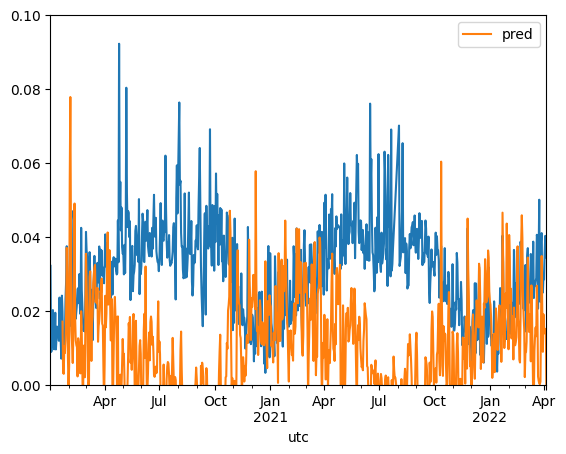

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
train_df['value'].plot(ax = ax)
predictions_backtest.plot(ax=ax)
plt.ylim(0, 0.1)

In [18]:
print(f'R^2 is {r2_score(train_df["value"].iloc[20:], predictions_backtest)}')

R^2 is -4.59198254861044


In [19]:
end_train = '2022-04-05'
power = 2
#poly_process = PolynomialFeatures(degree = power, include_bias=True)

X = train_df[['stp', 'wind_speed', 'max_sustained_wind', 'max_temp', 'min_temp','temperature', 'dewpoint']]
forecaster = ForecasterAutoreg(regressor = LinearRegression(), lags = 5)
forecaster.fit(y=train_df['value'])

metrics, predictions_backtest = backtesting_forecaster(forecaster = forecaster,
                                                       y = train_df['value'],
                                                       exog=X, 
                                                       initial_train_size = 20,
                                                       fixed_train_size = False,
                                                       steps = 2,
                                                      metric = 'mean_squared_error',
                                                       refit = False,
                                                       verbose = True)
                                                       
print(metrics)
        

Information of backtesting process
----------------------------------
Number of observations used for initial training: 20
Number of observations used for backtesting: 805
    Number of folds: 403
    Number of steps per fold: 2
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-22 00:00:00 -- 2020-01-23 00:00:00  (n=2)
Data partition in fold: 1
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-24 00:00:00 -- 2020-01-25 00:00:00  (n=2)
Data partition in fold: 2
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-26 00:00:00 -- 2020-01-27 00:00:00  (n=2)
Data partition in fold: 3
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-28 00:00:00 -- 2020-01-29 00:00:00  (n=2)
Data partition in fold: 4
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=2

(0.0, 0.1)

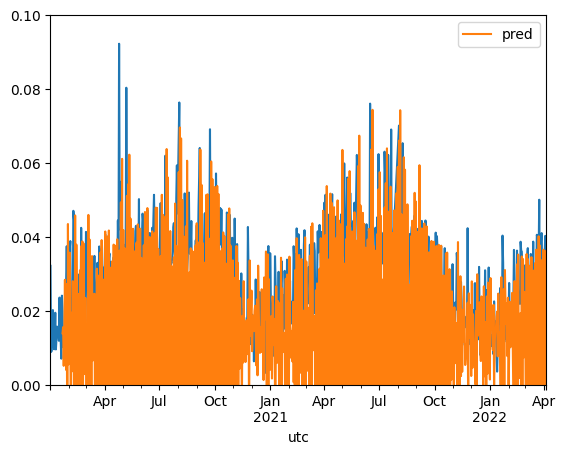

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
train_df['value'].plot(ax = ax)
predictions_backtest.plot(ax=ax)
plt.ylim(0, 0.1)

In [21]:
end_train = '2022-04-05'
power = 2
#poly_process = PolynomialFeatures(degree = power, include_bias=True)

X = train_df[['stp', 'wind_speed', 'max_sustained_wind', 'max_temp', 'min_temp','temperature', 'dewpoint']]
forecaster = ForecasterAutoreg(regressor = LinearRegression(), lags = 3)
forecaster.fit(y=train_df['value'])

metrics, predictions_backtest = backtesting_forecaster(forecaster = forecaster,
                                                       y = train_df['value'],
                                                       exog=X, 
                                                       initial_train_size = 20,
                                                       fixed_train_size = False,
                                                       steps = 1,
                                                      metric = 'mean_squared_error',
                                                       refit = True,
                                                       verbose = True)
                                                       
print(metrics)
        

Information of backtesting process
----------------------------------
Number of observations used for initial training: 20
Number of observations used for backtesting: 805
    Number of folds: 805
    Number of steps per fold: 1

Data partition in fold: 0
    Training:   2020-01-02 00:00:00 -- 2020-01-21 00:00:00  (n=20)
    Validation: 2020-01-22 00:00:00 -- 2020-01-22 00:00:00  (n=1)
Data partition in fold: 1
    Training:   2020-01-02 00:00:00 -- 2020-01-22 00:00:00  (n=21)
    Validation: 2020-01-23 00:00:00 -- 2020-01-23 00:00:00  (n=1)
Data partition in fold: 2
    Training:   2020-01-02 00:00:00 -- 2020-01-23 00:00:00  (n=22)
    Validation: 2020-01-24 00:00:00 -- 2020-01-24 00:00:00  (n=1)
Data partition in fold: 3
    Training:   2020-01-02 00:00:00 -- 2020-01-24 00:00:00  (n=23)
    Validation: 2020-01-25 00:00:00 -- 2020-01-25 00:00:00  (n=1)
Data partition in fold: 4
    Training:   2020-01-02 00:00:00 -- 2020-01-25 00:00:00  (n=24)
    Validation: 2020-01-26 00:00:00 -- 20

(0.0, 0.1)

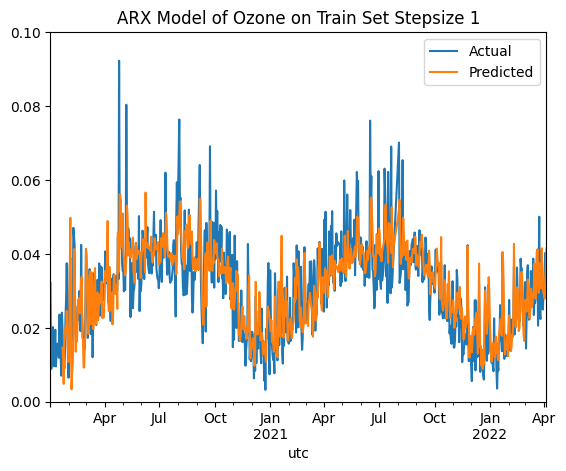

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('ARX Model of Ozone on Train Set Stepsize 1')
train_df['value'].plot(ax = ax)
predictions_backtest.plot(ax=ax)
plt.legend(['Actual', 'Predicted'])
plt.ylim(0, 0.1)

In [23]:
print(f'R^2 is {r2_score(train_df["value"].iloc[20:], predictions_backtest)}')

R^2 is 0.5895163624865902


### Validate model parameters on Test set.

In [24]:
test_df.tail()

,value,mobile,latitude,longitude,url,averaging_time,station,latitude-2,longitude-2,elevation,...,slp,stp,visibility,wind_speed,max_sustained_wind,gust,max_temp,min_temp,precipitation,snow_depth
utc,,,,,,,,,,,,,,,,,,,,,
2022-10-25,0.039957,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1018.3,992.7,10.0,2.7,8.0,15.86,79.0,53.1,0.0,0.0
2022-10-26,0.019015,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1014.0,988.4,9.8,2.7,8.9,15.24,79.0,53.1,0.0,0.0
2022-10-27,0.025576,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1014.0,988.5,10.0,3.6,7.0,14.62,79.0,53.1,0.0,0.0
2022-10-28,0.023734,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1017.8,992.3,10.0,2.5,8.0,14.00,80.1,53.1,0.0,0.0
2022-10-29,0.024316,0.0,34.181976,-118.36304,NaN,1.0,7.228802e+10,34.19966,-118.36543,222.7,...,1018.1,992.5,10.0,2.3,7.0,14.00,81.0,54.0,0.0,0.0


In [25]:
#poly_process = PolynomialFeatures(degree = power, include_bias=True)
end_train = '2022-10-29'
X = test_df[['stp', 'wind_speed', 'max_sustained_wind', 'max_temp', 'min_temp','temperature', 'dewpoint']]
forecaster = ForecasterAutoreg(regressor = LinearRegression(), lags = 3)
forecaster.fit(y=test_df['value'])

metrics, predictions_backtest = backtesting_forecaster(forecaster = forecaster,
                                                       y = test_df['value'],
                                                       exog=X, 
                                                       initial_train_size = 20,
                                                       fixed_train_size = False,
                                                       steps = 1,
                                                      metric = 'mean_squared_error',
                                                       refit = True,
                                                       verbose = True)
                                                       
print(metrics)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 20
Number of observations used for backtesting: 187
    Number of folds: 187
    Number of steps per fold: 1

Data partition in fold: 0
    Training:   2022-04-06 00:00:00 -- 2022-04-25 00:00:00  (n=20)
    Validation: 2022-04-26 00:00:00 -- 2022-04-26 00:00:00  (n=1)
Data partition in fold: 1
    Training:   2022-04-06 00:00:00 -- 2022-04-26 00:00:00  (n=21)
    Validation: 2022-04-27 00:00:00 -- 2022-04-27 00:00:00  (n=1)
Data partition in fold: 2
    Training:   2022-04-06 00:00:00 -- 2022-04-27 00:00:00  (n=22)
    Validation: 2022-04-28 00:00:00 -- 2022-04-28 00:00:00  (n=1)
Data partition in fold: 3
    Training:   2022-04-06 00:00:00 -- 2022-04-28 00:00:00  (n=23)
    Validation: 2022-04-29 00:00:00 -- 2022-04-29 00:00:00  (n=1)
Data partition in fold: 4
    Training:   2022-04-06 00:00:00 -- 2022-04-29 00:00:00  (n=24)
    Validation: 2022-04-30 00:00:00 -- 20

(0.0, 0.1)

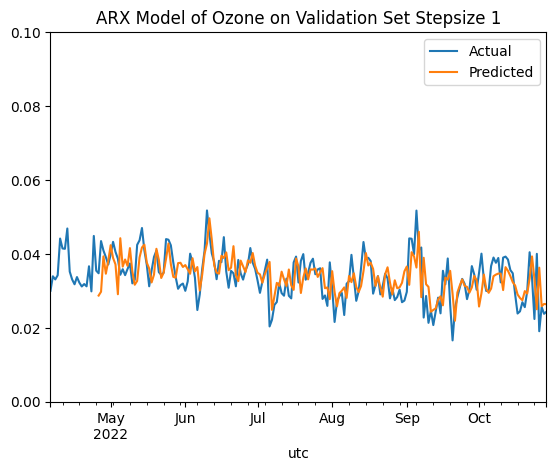

In [26]:
fig, ax = plt.subplots()
plt.title('ARX Model of Ozone on Validation Set Stepsize 1')
test_df['value'].plot(ax = ax)
predictions_backtest.plot(ax=ax)
plt.legend(['Actual', 'Predicted'])
plt.ylim(0, 0.1)